### Importing libraries ###

In [1]:
import pandas as pd
import numpy as np
from scipy import signal
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline

### Data Paths ###

In [2]:
features_path = "UCI HAR Dataset\\UCI HAR Dataset\\features.txt"
TRAIN = "UCI HAR Dataset\\UCI HAR Dataset\\train\\"
TEST = "UCI HAR Dataset\\UCI HAR Dataset\\test\\"
LABELS = "UCI HAR Dataset\\UCI HAR Dataset\\"

### Feature Engineering ###

In [3]:
features_for_classification = ['tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 
'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z',
'tGravityAcc-energy()-X', 'tGravityAcc-energy()-Y', 'tGravityAcc-energy()-Z',
'tGravityAcc-entropy()-X', 'tGravityAcc-entropy()-Y', 'tGravityAcc-entropy()-Z',
'tBodyAccJerk-energy()-X', 'tBodyAccJerk-energy()-Y', 'tBodyAccJerk-energy()-Z',
'tBodyAccJerk-entropy()-X', 'tBodyAccJerk-entropy()-Y', 'tBodyAccJerk-entropy()-Z',
'tBodyGyro-energy()-X', 'tBodyGyro-energy()-Y', 'tBodyGyro-energy()-Z',
'tBodyGyro-entropy()-X', 'tBodyGyro-entropy()-Y', 'tBodyGyro-entropy()-Z',
'tBodyGyroJerk-energy()-X', 'tBodyGyroJerk-energy()-Y', 'tBodyGyroJerk-energy()-Z',
'tBodyGyroJerk-entropy()-X', 'tBodyGyroJerk-entropy()-Y', 'tBodyGyroJerk-entropy()-Z',
'tBodyAccMag-energy()', 'tBodyAccMag-entropy()', 'tGravityAccMag-energy()', 'tGravityAccMag-entropy()',
'tBodyAccJerkMag-energy()', 'tBodyAccJerkMag-entropy()', 'tBodyGyroMag-energy()', 'tBodyGyroMag-entropy()',
'tBodyGyroJerkMag-entropy()', 'tBodyGyroJerkMag-energy()',
'fBodyAcc-energy()-X', 'fBodyAcc-energy()-Y', 'fBodyAcc-energy()-Z',
'fBodyAcc-entropy()-X', 'fBodyAcc-entropy()-Y', 'fBodyAcc-entropy()-Z', 
'fBodyAcc-entropy()-X', 'fBodyAcc-entropy()-Y', 'fBodyAcc-entropy()-Z',
'fBodyAccJerk-energy()-X', 'fBodyAccJerk-energy()-Y', 'fBodyAccJerk-energy()-Z',
'fBodyAccJerk-entropy()-X', 'fBodyAccJerk-entropy()-Y', 'fBodyAccJerk-entropy()-Z',
'fBodyGyro-energy()-X', 'fBodyGyro-energy()-Y', 'fBodyGyro-energy()-Z',
'fBodyGyro-entropy()-X', 'fBodyGyro-entropy()-Y', 'fBodyGyro-entropy()-Z',
'fBodyAccMag-energy()', 'fBodyAccMag-entropy()', 'fBodyBodyAccJerkMag-energy()', 'fBodyBodyAccJerkMag-entropy()',
'fBodyBodyGyroJerkMag-energy()', 'fBodyBodyGyroJerkMag-entropy()']

### Defining our methods ###

In [4]:
def file_to_df(path):
    file_data = []   
    with open(path) as file:
        for line in file:
            # remove whitespace at the start and the newline at the end
            column = line.replace('  ', ' ').strip().split(' ')
            file_data.append(column)
        file_data =  pd.DataFrame(file_data)
    return file_data

In [5]:
# Load "X" (training input signals)

def load_X(X_signals_paths):
    X_signals = []
    
    for signal_type_path in X_signals_paths:
        file = open(signal_type_path, 'r')
        # Read dataset from disk, dealing with text files' syntax
        X_signals.append(
            [np.array(serie, dtype=np.float32) for serie in [
                row.replace('  ', ' ').strip().split(' ') for row in file
            ]]
        )
        file.close()
    
    return np.transpose(np.array(X_signals), (1, 2, 0))

In [6]:
def plot_signals(data, title):
    plt.figure(figsize=(11, 9))
    plt.plot(data[0], color='red', label="Signal along x-axis")
    plt.plot(data[1], color='blue', label="Signal along y-axis")
    plt.plot(data[2], color='green', label="Signal along z-axis")
    plt.title(title)
    plt.xlabel('Time (1/50th sec. per tick)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

## Exploratory Data Analysis ##

In [7]:
# Useful Constants

# Those are separate normalised input features for the neural network
INPUT_SIGNAL_TYPES = [
    "body_acc_x_",
    "body_acc_y_",
    "body_acc_z_",
    "body_gyro_x_",
    "body_gyro_y_",
    "body_gyro_z_",
    "total_acc_x_",
    "total_acc_y_",
    "total_acc_z_"
]


### Train and Test Data ###

#### Loading features ####

In [10]:
features = file_to_df(features_path)
features = features.drop(0, axis=1)

#### Loading Train set ####

In [11]:
X_train = file_to_df(TRAIN+"X_train.txt")

In [12]:
#adding column names to the dataset
X_train = X_train.rename(features[1], axis='columns')

In [13]:
#using only 67 features (out of 561) for classification
X_train = X_train.loc[:,features_for_classification]

In [35]:
X_train.shape

(7352, 67)

In [15]:
y_train = file_to_df(TRAIN+"y_train.txt")

In [16]:
# activity labels
labels = file_to_df(LABELS+"activity_labels.txt")
labels = labels.rename({0:"activity_num", 1:"activity"}, axis='columns')

In [17]:
# volunteers who performed the activities for this dataset
subjects = file_to_df(TRAIN+"subject_train.txt")

#### Loading Test set ####

In [18]:
X_test = file_to_df(TEST+"X_test.txt")

In [19]:
#adding column names to the dataset
X_test = X_test.rename(features[1], axis='columns')

In [20]:
#using only 67 features (out of 561)
X_test = X_test.loc[:,features_for_classification]

In [21]:
y_test = file_to_df(TEST+"y_test.txt")

## Plotting signals for all Activities ##

In [ ]:
acc_signals_paths = [
    TRAIN + "Inertial Signals/" + signal + "train.txt" for signal in INPUT_SIGNAL_TYPES[:3]
]
acc_signals = load_X(acc_signals_paths)

In [31]:
acc_signals.shape

(7352, 128, 3)

In [34]:
pd.DataFrame(acc_signals[0:5,:,0]) 

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.000181,0.010139,0.009276,0.005066,0.010810,0.004045,0.004757,0.006214,0.003307,0.007572,...,0.001412,-0.001509,0.000060,0.000435,-0.000819,0.000228,-0.000300,-0.001147,-0.000222,0.001576
1,0.001094,0.004550,0.002879,0.002247,0.003305,0.002416,0.001619,0.000981,0.000009,-0.000363,...,-0.000104,-0.000141,0.001333,0.001541,0.001077,-0.000736,-0.003767,-0.004646,-0.002941,-0.001599
2,0.003531,0.002285,-0.000420,-0.003738,-0.006706,-0.003148,0.000733,0.000668,0.002162,-0.000946,...,0.000661,0.001853,-0.000268,-0.000394,-0.000279,-0.000316,0.000144,0.001246,0.003117,0.002178
3,-0.001772,-0.001311,0.000388,0.000408,-0.000355,0.000998,0.001109,-0.003149,-0.008882,-0.010483,...,0.000458,0.002103,0.001358,0.000820,-0.000212,-0.001915,-0.001631,-0.000867,-0.001172,-0.000028
4,0.000087,-0.000272,0.001022,0.003126,0.002284,0.000885,0.001933,0.002270,0.002247,0.002175,...,0.002529,0.003518,-0.000248,-0.002761,0.000252,0.003752,0.001626,-0.000698,-0.001223,-0.003328


In [ ]:
acc_signals.head()

### Accelerometer signals while Walking ###

In [23]:
w_record_idx = y_train.index[y_train[0]=="1"].tolist()[0]

In [24]:
w_record = acc_signals[w_record_idx].transpose()

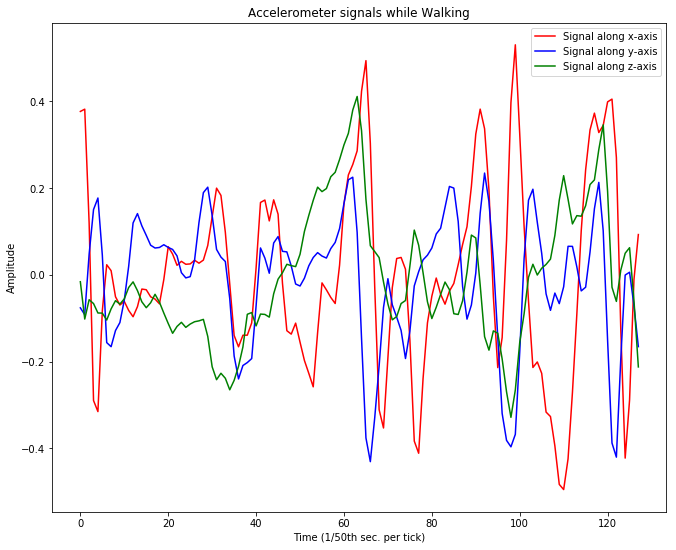

In [25]:
plot_signals(w_record,"Accelerometer signals while Walking")

### Accelerometer signals while Walking Upstairs ###

In [311]:
wu_record_idx = y_train.index[y_train[0]=="2"].tolist()[0]

In [312]:
wu_record = acc_signals[wu_record_idx].transpose()

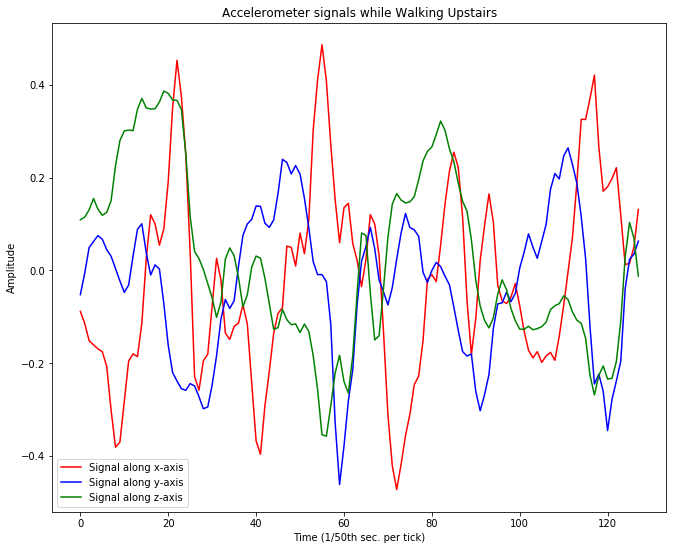

In [313]:
plot_signals(wu_record,"Accelerometer signals while Walking Upstairs")

### Accelerometer signals while Walking Downstairs ###

In [314]:
wd_record_idx = y_train.index[y_train[0]=="3"].tolist()[0]

In [315]:
wd_record = acc_signals[wd_record_idx].transpose()

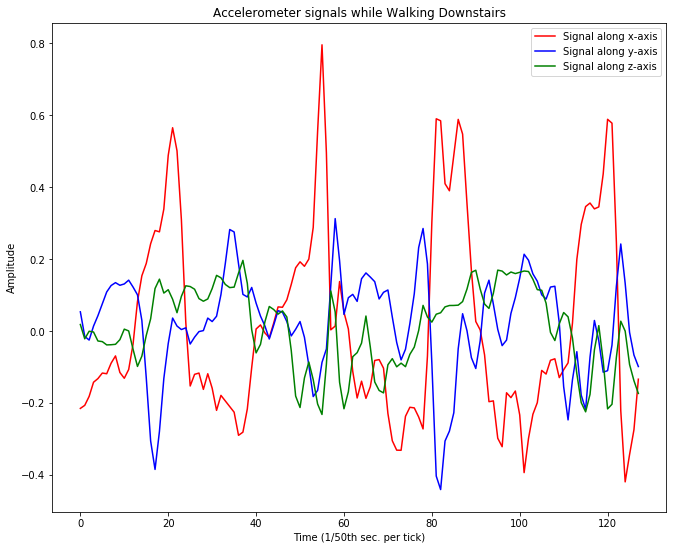

In [316]:
plot_signals(wd_record,"Accelerometer signals while Walking Downstairs")

### Accelerometer signals while Sitting ###

In [317]:
s_record_idx = y_train.index[y_train[0]=="4"].tolist()[0]

In [318]:
s_record = acc_signals[s_record_idx].transpose()

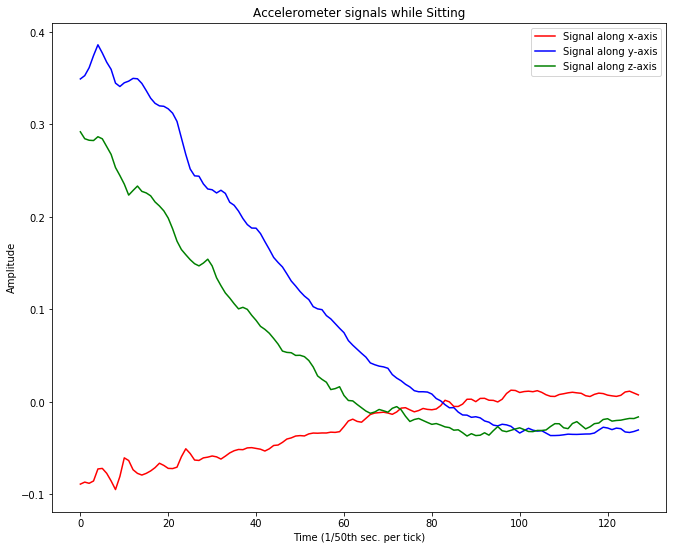

In [319]:
plot_signals(s_record,"Accelerometer signals while Sitting")

### Accelerometer signals while Standing ###

In [320]:
st_record_idx = y_train.index[y_train[0]=="5"].tolist()[0]

In [321]:
st_record = acc_signals[st_record_idx].transpose()

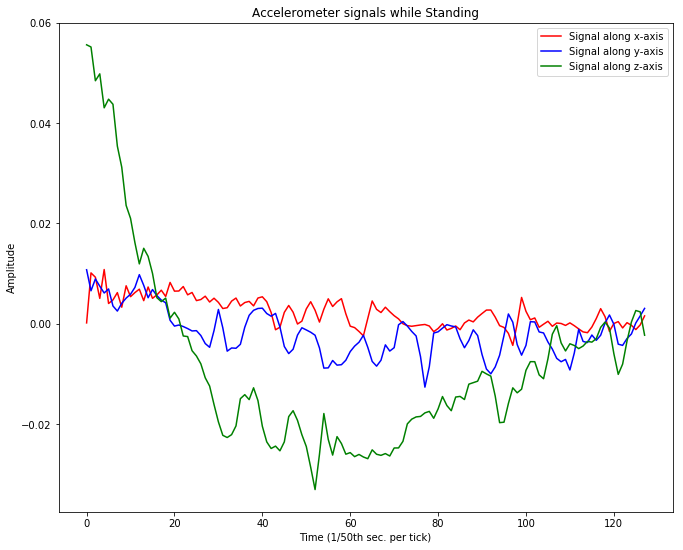

In [322]:
plot_signals(st_record,"Accelerometer signals while Standing")

### Accelerometer signals while Laying ###

In [323]:
l_record_idx = y_train.index[y_train[0]=="6"].tolist()[0]

In [324]:
l_record = acc_signals[l_record_idx].transpose()

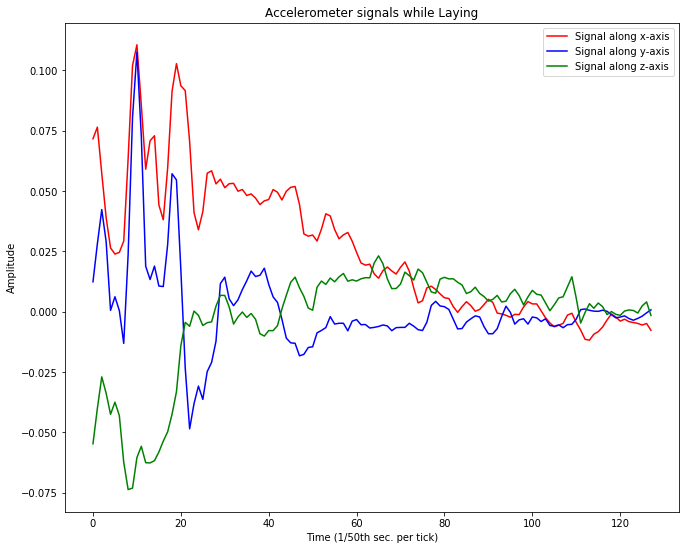

In [325]:
plot_signals(l_record,"Accelerometer signals while Laying")

## For Gyroscope ##

In [326]:
gyr_signals_paths = [
    TRAIN + "Inertial Signals/" + signal + "train.txt" for signal in INPUT_SIGNAL_TYPES[3:6]
]
gyr_signals = load_X(gyr_signals_paths)

### Gyroscope signals while Walking ###

In [327]:
w_record = gyr_signals[w_record_idx].transpose()

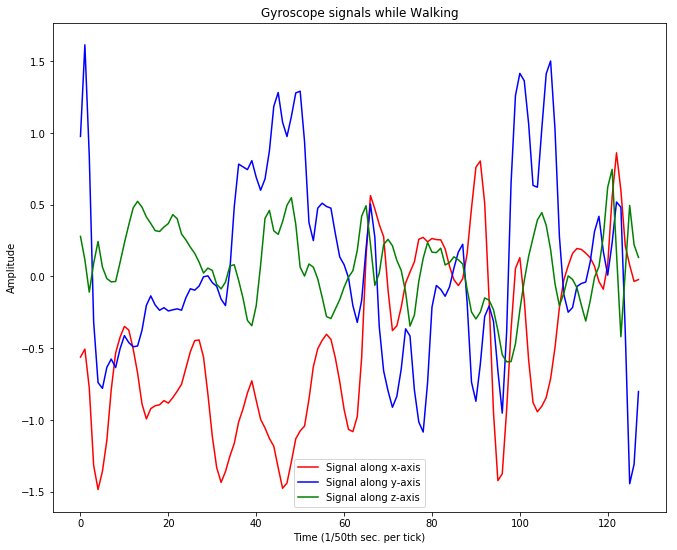

In [328]:
plot_signals(w_record,"Gyroscope signals while Walking")

### Gyroscope signals while Walking Upstairs ###

In [329]:
wu_record = gyr_signals[wu_record_idx].transpose()

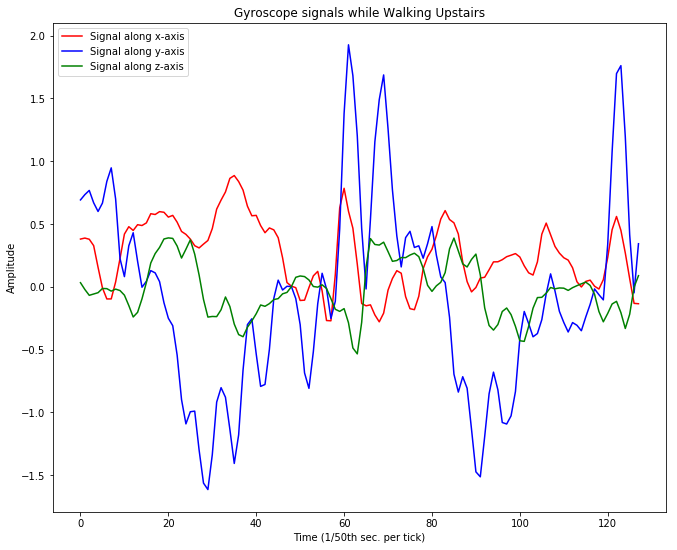

In [330]:
plot_signals(wu_record,"Gyroscope signals while Walking Upstairs")

### Gyroscope signals while Walking Downstairs ###

In [331]:
wd_record = gyr_signals[wd_record_idx].transpose()

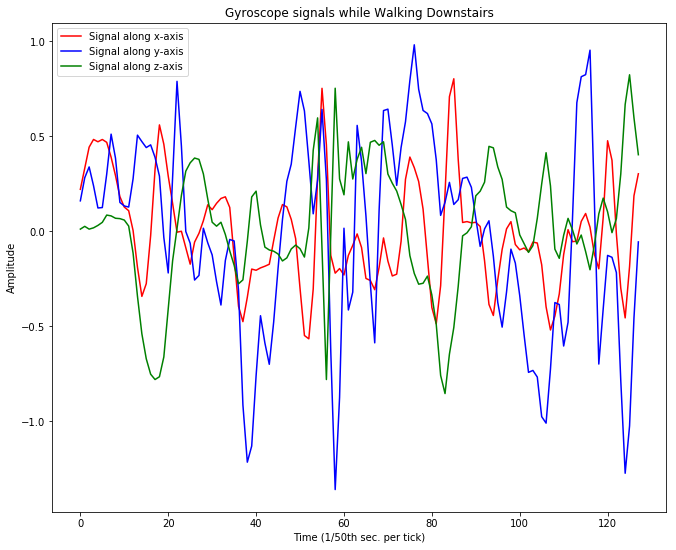

In [332]:
plot_signals(wd_record,"Gyroscope signals while Walking Downstairs")

### Gyroscope signals while Sitting ###

In [333]:
s_record = gyr_signals[s_record_idx].transpose()

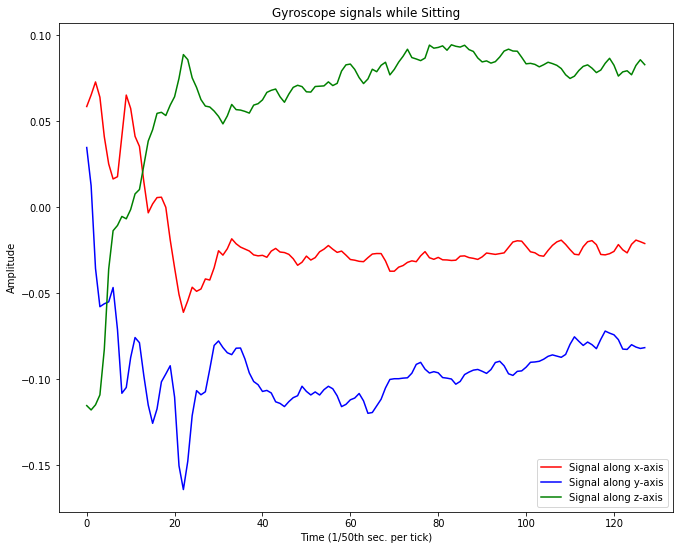

In [334]:
plot_signals(s_record,"Gyroscope signals while Sitting")

### Gyroscope signals while Standing ###

In [335]:
st_record = gyr_signals[st_record_idx].transpose()

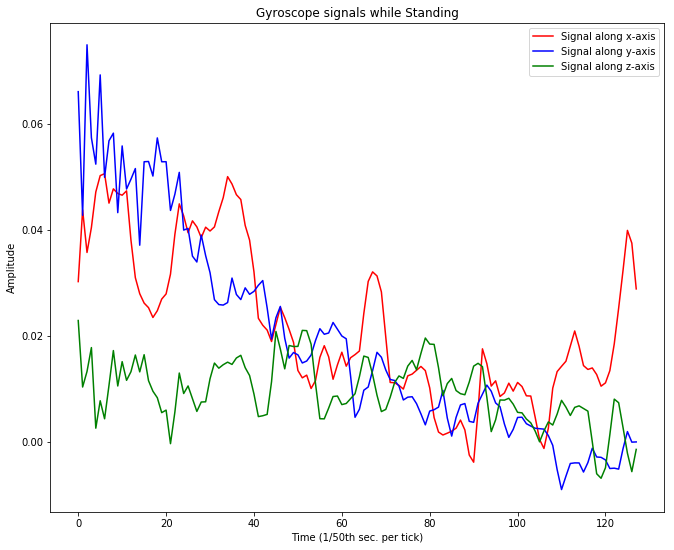

In [336]:
plot_signals(st_record,"Gyroscope signals while Standing")

### Gyroscope signals while Laying ###

In [337]:
l_record = gyr_signals[l_record_idx].transpose()

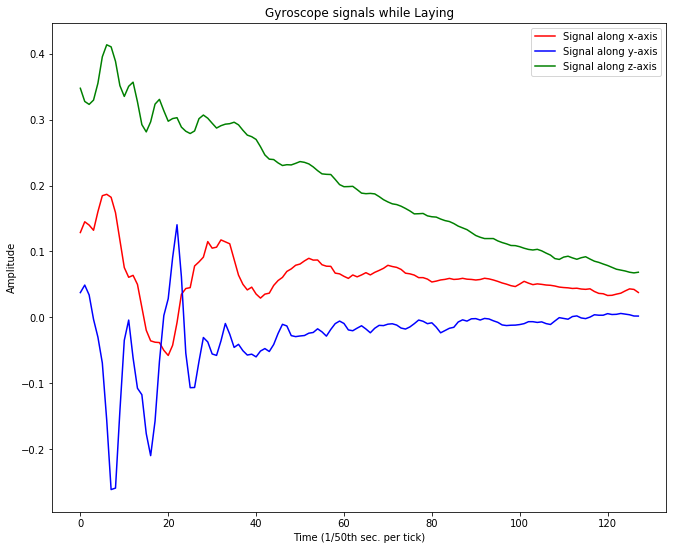

In [338]:
plot_signals(l_record,"Gyroscope signals while Laying")

### Implementing Multi-Class SVM ###

In [350]:
classifier = svm.SVC(gamma=0.001, decision_function_shape='ovo')

In [351]:
classifier.fit(X_train, y_train[0])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [352]:
training_outcome = classifier.predict(X_train)
testing_outcome = classifier.predict(X_test)

In [366]:
svm_accuracy = accuracy_score(y_test, testing_outcome)*100
print('Training accuracy...', accuracy_score(y_train, training_outcome)*100)
print('Validation accuracy', svm_accuracy)

Training accuracy... 84.05875952121872
Validation accuracy 81.26908720732948


In [354]:
conf_matrix_svm = confusion_matrix(y_test, testing_outcome)
print(conf_matrix_svm)

[[485   7   4   0   0   0]
 [109 356   6   0   0   0]
 [155  31 234   0   0   0]
 [  0   3   0 279 205   4]
 [  0   4   0  24 504   0]
 [  0   0   0   0   0 537]]


## Implementing Decision Tree ##

In [355]:
clf = DecisionTreeClassifier(criterion = "gini", random_state = 42, 
            max_depth = 10, min_samples_leaf = 10)

In [356]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [357]:
y_pred_dt = clf.predict(X_test)

In [358]:
conf_matrix = confusion_matrix(y_test,y_pred_dt)
print(conf_matrix)

[[416  71   9   0   0   0]
 [ 82 363  26   0   0   0]
 [ 50  63 307   0   0   0]
 [  0   1   0 377 113   0]
 [  0   0   0  76 456   0]
 [  0   1   0   0   0 536]]


In [359]:
descision_tree_acc = accuracy_score(y_test, y_pred_dt) * 100
print(descision_tree_acc)

83.3050559891415


## Implementing Random Forest Classifier ##

In [360]:
rf_clf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

In [361]:
rf_clf.fit(X_train, y_train)

D:\softwares\AnacondaInstall\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [ ]:
y_pred_rf = rf_clf.predict(X_test)

In [364]:
conf_matrix_rf = confusion_matrix(y_test,y_pred_rf)
print(conf_matrix_rf)

[[464  26   6   0   0   0]
 [ 34 431   6   0   0   0]
 [ 24  52 344   0   0   0]
 [  0   0   0 434  57   0]
 [  0   0   0  23 509   0]
 [  0   0   0   0   0 537]]


In [363]:
rf_acc = accuracy_score(y_test, y_pred_rf) * 100
print(rf_acc)

92.26331862911435


([<matplotlib.axis.XTick at 0x1ef1d776ba8>,
 <a list of 3 Text xticklabel objects>)

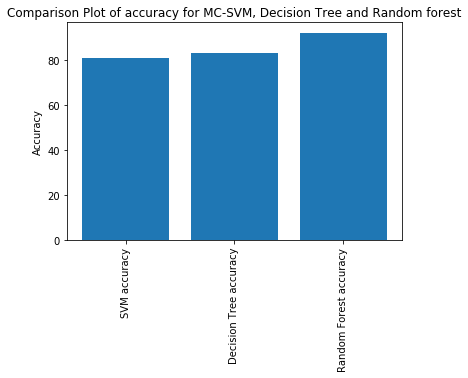

In [367]:
outcomes = ["SVM accuracy", "Decision Tree accuracy", "Random Forest accuracy"]
accuracy= [ svm_accuracy, descision_tree_acc, rf_acc]
plt.bar(outcomes, accuracy)
plt.title('Comparison Plot of accuracy for MC-SVM, Decision Tree and Random forest')
plt.ylabel('Accuracy')
plt.xticks(outcomes, rotation='vertical')